In [1]:
import pandas as pd
import numpy as np 

In [1]:
import os
import time
import statistics
import urllib.request

In [2]:
from datetime import datetime
from time import mktime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")
import re

In [3]:
path = "/Users/sanjeevahuja/downloads/intraQuarter"

# Data parsing

In [27]:
def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'DE ratio',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sentdex1.csv")
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:25]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
        starting_stock_value=False
        starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    try:
                        value=float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    except Exception as e:
                        try:
                            value=float(source.split(gather+':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0])
                        except Exception as e:
                            pass
                            #print(e,ticker,file)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    try:    
                        stock_price= float(source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                    except Exception as e:
                        try:
                            stock_price= (source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                            stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price=float(stock_price.group(1))
                        except Exception as e:
                            try:
                                stock_price= (source.split(' <span class="time_rtq_ticker">')[1].split('</span>')[0]) 
                                stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                                stock_price=float(stock_price.group(1))
                            except Exception as e:
                                print(e)
                        
                    #print("stock_price:",stock_price,"ticker:",ticker)
                    
                    
                    if not starting_stock_value:
                        starting_stock_value=stock_price
                    if not starting_sp500_value:
                        starting_sp500_value=sp500_value
                      
                     
                    stock_p_change=((stock_price-starting_stock_value)/starting_stock_value)*100
                    sp500_p_change=((sp500_value-starting_sp500_value)/starting_sp500_value)*100    
                       
                    difference=stock_p_change-sp500_p_change
                    
                    if difference>0:
                        status="outperform"
                    else:
                        status="underperform"
                        
                    
                    
                    
                    df=df.append({'Date':date_stamp,
                                  'Unix':unix_time,
                                  'Ticker':ticker,
                                  'DE ratio':value,
                                  'Price':stock_price,
                                  'stock_p_change':stock_p_change,
                                  'SP500':sp500_value,
                                  'sp500_p_change':sp500_p_change,
                                  'Difference':stock_p_change-sp500_p_change,
                                  'Status':status },ignore_index=True)
                #print(ticker+":"+value)
                except Exception as e:
                    #print(str(e))
                    pass
    
    for each_ticker in ticker_list:
        try:
            plot_df=df[(df['Ticker']==each_ticker)]
            plot_df=plot_df.set_index(['Date'])
            
            if plot_df['Status'][-1]=="underperform":
                color='r';
            else:
                color='g';
             
            
            plot_df['Difference'].plot(label=each_ticker,color=color)
            plt.legend()
        except:
            pass
    plt.show()    
                
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    print(save)
    df.to_csv(save)
    
    

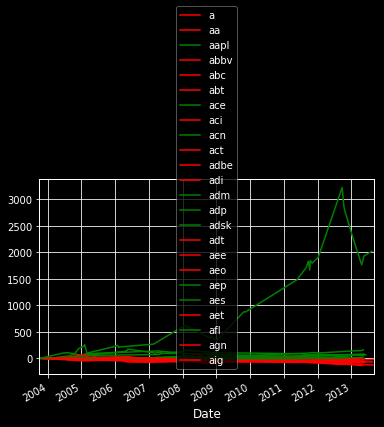

TotalDebtEquitymrq.csv


In [29]:
Key_Stats()    

# Adding more features

In [5]:
def Key_Stats_two(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])
    
    
    sp500_df=pd.DataFrame.from_csv("sentdex1.csv")
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
        starting_stock_value=False
        starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    value_list=[]
                    for each_data in gather:

                        try:
                            regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value=re.search(regex,source)
                            value=(value.group(1))
                            
                            if "B" in value:
                                value=float(value.replace("B",''))*1000000000
                            elif "M" in value:
                                value=float(value.replace("M",''))*1000000
                            
                            value_list.append(value)
                        except Exception as e:
                            value="N/A"
                            value_list.append(value)
                          
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    try:    
                        stock_price= float(source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                    except Exception as e:
                        try:
                            stock_price= (source.split('</small><big><b>')[1].split('</b></big>')[0]) 
                            stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                            stock_price=float(stock_price.group(1))
                        except Exception as e:
                            try:
                                stock_price= (source.split(' <span class="time_rtq_ticker">')[1].split('</span>')[0]) 
                                stock_price=re.search(r'(\d{1,8}\.\d{1,8})',stock_price)
                                stock_price=float(stock_price.group(1))
                            except Exception as e:
                                print(e)
                        
                    #print("stock_price:",stock_price,"ticker:",ticker)
                    
                    
                    if not starting_stock_value:
                        starting_stock_value=stock_price
                    if not starting_sp500_value:
                        starting_sp500_value=sp500_value
                      
                     
                    stock_p_change=((stock_price-starting_stock_value)/starting_stock_value)*100
                    sp500_p_change=((sp500_value-starting_sp500_value)/starting_sp500_value)*100    
                       
                    difference=stock_p_change-sp500_p_change
                    
                    if difference>0:
                        status="outperform"
                    else:
                        status="underperform"
                        
                    if value_list.count("N/A")>0:
                        pass
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                        
                    
                    
                                        

                #print(ticker+":"+value)
                except Exception as e:
                    #print(str(e))
                    pass
                
    save = ('stock_data.csv')
    print(save)
    df.to_csv(save)           

In [6]:
Key_Stats_two()

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
stock_data.csv


# Applying ML in above CSV file

In [5]:
from sklearn import svm,preprocessing
style.use("ggplot")

In [6]:
FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

In [7]:
def Build_Data_Set():
    data_df=pd.DataFrame.from_csv("stock_data.csv")
    
    data_df=data_df.reindex(np.random.permutation(data_df.index))
    
    X=np.array(data_df[FEATURES].values)
    
    y=(data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X=preprocessing.scale(X)
    
    return X,y
    

In [8]:
def Analysis():
    
    test_size=1000
    X,y=Build_Data_Set()
    print(len(X))

    clf=svm.SVC(kernel="linear",C=1.0)
    clf.fit(X[:-test_size],y[:-test_size])
    
    correct_count=0
    for x in range(1,test_size+1):
        if clf.predict(X[[-x]])[0]==y[-x]:
            correct_count+=1
    print("ACC.",(correct_count/test_size)*100)        

  

In [9]:
Analysis()

/Users/sanjeevahuja/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2991
ACC. 67.30000000000001


# Using Quandl to get the Stock Prices

In [7]:
import quandl

In [13]:
auth_tok="hvGWQxhsh8YYh7K9WzZF"
# data=quandl.get("WIKI/bks",trim_start="2000-12-12",trim_end="2014-12-30",authtoken='hvGWQxhsh8YYh7K9WzZF') 
# print(data["Adj. Close"])
def Stock_Prices():
    sp_df=pd.DataFrame()
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    
    for each_dir in stock_list[1:]:
        try:
            ticker=each_dir.split("_KeyStats/")[1]
            name="WIKI/"+ticker
            print(ticker)
            data=quandl.get(name,trim_start="2000-12-12",trim_end="2014-12-30",authtoken='hvGWQxhsh8YYh7K9WzZF')
            data[ticker.upper()]=data["Adj. Close"]
            sp_df=pd.concat([sp_df,data[ticker.upper()]],axis=1)
        except Exception as e:
            print(str(e))
    
    sp_df.to_csv("stock_price.csv")

Stock_Prices()    

a
aa
aapl
abbv
abc
abt
ace
aci
acn
act
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
adbe
adi
adm
adp
adsk
adt
aee
aeo
aep
aes
aet
afl
agn
aig
aiv
aiz
akam
all
altr
alxn
amat
amd
amgn
amp
amt
amzn
an
anf
ann
aon
apa
apc
apd
aph
apol
arg
arna
aro
ati
atvi
avb
avp
avy
axp
azo
ba
bac
bax
bbby
bbry
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bbt
bby
bcr
bdx
beam
ben
bf-b
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bhi
big
biib
bk
bks
blk
bll
bmc
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bms
bmy
brcm
brk-b
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.
bsx
btu
bwa
bxp
c
ca
cab
cag
cah
cam
ca

# Using next year data to compute the Status

In [79]:
def Key_Stats_three(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath=path+'/_KeyStats'
    stock_list=[x[0] for x in os.walk(statspath)]
    df=pd.DataFrame(columns=['Date',
                             'Unix',
                             'Ticker',
                             'Price',
                             'stock_p_change',
                             'SP500',
                             'sp500_p_change',
                             'Difference',
                             ##############
                                     'DE Ratio',
                                     'Trailing P/E',
                                     'Price/Sales',
                                     'Price/Book',
                                     'Profit Margin',
                                     'Operating Margin',
                                     'Return on Assets',
                                     'Return on Equity',
                                     'Revenue Per Share',
                                     'Market Cap',
                                     'Enterprise Value',
                                     'Forward P/E',
                                     'PEG Ratio',
                                     'Enterprise Value/Revenue',
                                     'Enterprise Value/EBITDA',
                                     'Revenue',
                                     'Gross Profit',
                                     'EBITDA',
                                     'Net Income Avl to Common ',
                                     'Diluted EPS',
                                     'Earnings Growth',
                                     'Revenue Growth',
                                     'Total Cash',
                                     'Total Cash Per Share',
                                     'Total Debt',
                                     'Current Ratio',
                                     'Book Value Per Share',
                                     'Cash Flow',
                                     'Beta',
                                     'Held by Insiders',
                                     'Held by Institutions',
                                     'Shares Short (as of',
                                     'Short Ratio',
                                     'Short % of Float',
                                     'Shares Short (prior ',                                
                                     ##############
                             'Status'])
    sp500_df=pd.DataFrame.from_csv("sentdex1.csv")
    stock_df=pd.DataFrame.from_csv("stock_price.csv");
    #print(sp500_df)
    #print(stock_list)
    
    ticker_list=[]
    
    for each_dir in stock_list[1:]:
        each_file=os.listdir(each_dir)
        ticker=each_dir.split("_KeyStats/")[1]
        ticker_list.append(ticker)
        
#         starting_stock_value=False
#         starting_sp500_value=False
        
        #print(each_dir)
        if(len(each_file)>0):
            for file in each_file:
                date_stamp=datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time=time.mktime(date_stamp.timetuple())
                #print(date_stamp)
                full_file_path=each_dir+'/'+file
                #print(full_file_path)
                source=open(full_file_path,'r').read()
                try:
                    value_list=[]
                    for each_data in gather:
                        try:
                            regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value=re.search(regex,source)
                            value=(value.group(1))

                            if "B" in value:
                                    value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                        
                        
                        except Exception as e: 
                            value="N/A"
                            value_list.append(value)
                    
                    try:
                        sp500_date=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                    except Exception as e:
                        sp500_date=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_date)]
                        sp500_value=float(row["Adj Close"])
                        
                        
                    one_yr_later=int(unix_time+31536000)    
                        
                    try:
                        sp500_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=sp500_df[(sp500_df.index==sp500_1y)]
                        sp500_1y_value=float(row["Adj Close"])
                    except Exception as e:
                        try:
                            sp500_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=sp500_df[(sp500_df.index==sp500_1y)]
                            sp500_1y_value=float(row["Adj Close"])
                        except Exception as e:    
                            print("s&p500 1yr later Exception",e) 
                            
                            
                    try:
                        stock_price_1y=datetime.fromtimestamp(one_yr_later).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                        stock_1y_value=round(float(row),2)
                    
                    except Exception as e:
                        try:
                            stock_price_1y=datetime.fromtimestamp(one_yr_later-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price_1y)][ticker.upper()]
                            stock_1y_value=round(float(row),2)
                        except Exception as e:
                            print("stock price 1yr later exception",e)
                                
                    try:
                        stock_price=datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')
                        row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                        stock_price=round(float(row),2)
                    except Exception as e:
                        try:
                            stock_price=datetime.fromtimestamp(unix_time-259200).strftime('%Y-%m-%d')
                            row=stock_df[(stock_df.index==stock_price)][ticker.upper()]
                            stock_price=round(float(row),2)
                        except Exception as e:
                            print("stock price exception",e)           
                            
                    stock_p_change=round((((stock_1y_value-stock_price)/stock_price)*100),2)
                    sp500_p_change=round((((sp500_1y_value-sp500_value)/sp500_value)*100),2)
                    
                    difference=stock_p_change-sp500_p_change
                    if difference > 5:
                        status=1
                    else:
                        status=0
                        
                    if value_list.count("N/A")>0:
                        pass
                    
                    else:
                        df = df.append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                        
                        
                        
                        
                #print(ticker+":"+value)
                except Exception as e:
                    pass
                    #print(e,ticker,file)
    
    
                
    df.to_csv("key_stats_acc_perf_NO_NA_enhanced.csv")

In [80]:
Key_Stats_three()

s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'ACT'
stock price exception 'ACT'
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
s&p500 1yr later Exception cannot convert the series to <class 'float'>
stock price 1yr later exception cannot convert the series to <class 'float'>
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price exception 'BBRY'
stock price 1yr later exception 'BBRY'
stock price ex

# Apply ML to above CSV File

In [81]:
def Build_Data_Set_two():
    data_df=pd.DataFrame.from_csv("key_stats_acc_perf_NO_NA_enhanced.csv")
    
    data_df=data_df.reindex(np.random.permutation(data_df.index))
#     data_df=data_df.replace("nan",0).replace("N/A",0)
    
    X=np.array(data_df[FEATURES].values)
    
    y=(data_df["Status"].replace("underperform",0).replace("outperform",1).values.tolist())
    X=preprocessing.scale(X)
    
    Z=np.array(data_df[["stock_p_change","sp500_p_change"]])
    Z=np.nan_to_num(Z)
    
    return X,y,Z

In [9]:
def Analysis():
    
    test_size=1000
    X,y,Z=Build_Data_Set_two()
    print(len(X))

    clf=svm.SVC(kernel="linear",C=1.0)
    clf.fit(X[:-test_size],y[:-test_size])
    
    correct_count=0
    invest_amt=10000
    total_invests=0
    if_market=0
    if_strat=0
    
    
    for x in range(1,test_size+1):
        if clf.predict(X[[-x]])[0]==y[-x]:
            correct_count+=1
            
        if clf.predict(X[[-x]])[0]==1:
            invest_ret=invest_amt+(invest_amt*(Z[-x][0]/100))
            market_ret=invest_amt+(invest_amt*(Z[-x][1]/100))
            total_invests+=1
            if_market +=market_ret
            if_strat  +=invest_ret
            
    print("ACC.",(correct_count/test_size)*100)
    print("total invests:",total_invests)
    print("Ending with Strategy",if_strat)
    print("Ending with Market",if_market)
    
    compared=((if_strat-if_market)/if_market)*100
    print("COmpared to market we earned",str(compared),"% more")
    
    
    do_nothing=total_invests*invest_amt
    avg_market=((if_market-do_nothing)/do_nothing)*100
    avg_strat=((if_strat-do_nothing)/do_nothing)*100
    
    print("Avg Strat ret :",str(avg_strat)+"%")
    print("Avg Market ret :",str(avg_market)+"%")

  

In [10]:
Analysis()

/Users/sanjeevahuja/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2991
ACC. 57.8
total invests: 983
Ending with Strategy 11606816.3495
Ending with Market 10759741.1034
COmpared to market we earned 7.87263594882 % more
Avg Strat ret : 18.0754460781%
Avg Market ret : 9.45820044124%


# For Scrapping Static Pages

In [45]:
def Check_Yahoo():
    statspath=path+"/_KeyStats"
    stock_list=[x[0] for x in os.walk(statspath)]
    
    for e in stock_list[1:]:
        try:
            e=e.split("/Users/sanjeevahuja/downloads/intraQuarter/_KeyStats/")[1]
            link="https://finance.yahoo.com/quote/"+e.upper()+"/key-statistics?p="+e.upper()
            resp=urllib.request.urlopen(link).read()
            save="forward/"+str(e)+".html"
            store= open(save,"w")
            store.write(str(resp))
            store.close()
            
        except Exception as e:
            print(str(e))
            time.sleep(2)
            
            
            
Check_Yahoo()            
            
        

a
aa
aapl
abbv


In [58]:
def Forward(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avi to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
#     statspath=path+'/_KeyStats'
#     stock_list=[x[0] for x in os.walk(statspath)]
    
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avi to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])
    
    

    
    
    file_list=os.listdir("forward")
    
    for each_file in file_list[1:]:
        ticker=each_file.split(".html")[0]
        full_file_path="forward/"+each_file
        source=open(full_file_path,"r").read()        
        
        
  
        try:
            value_list=[]
            for each_data in gather:

                try:
                    regex=re.escape(each_data)+r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                    value=re.search(regex,source)
                    value=(value.group(1))
 
                    if "B" in value:
                        value=float(value.replace("B",''))*1000000000
                    elif "M" in value:
                        value=float(value.replace("M",''))*1000000

                    value_list.append(value)
                except Exception as e:
                    value="N/A"
                    value_list.append(value)


            try:
                regex=re.escape("Net Income")+r'.*?(\d{1,8}\.\d{1,8}M?B?|\d{1,8}M?B?|N/A)%?</td>'
                valu=re.search(regex,source)
                valu=(valu.group(1))

                if "B" in valu:

                    print("B")
                    valu=float(valu.replace("B",''))*1000000000
                elif "M" in valu:
                    print("M")
                    valu=float(valu.replace("M",''))*1000000
                print(ticker,valu)
            except Exception as e:
                print(e)

        #print(value_list)

            if value_list.count("N/A")>5:
                pass

            else:
                df = df.append({'Date':"N/A",
                                    'Unix':"N/A",
                                    'Ticker':ticker,

                                    'Price':"N/A",
                                    'stock_p_change':"N/A",
                                    'SP500':"N/A",
                                    'sp500_p_change':"N/A",
                                    'Difference':"N/A",
                                    'DE Ratio':value_list[0],
                                    #'Market Cap':value_list[1],
                                    'Trailing P/E':value_list[1],
                                    'Price/Sales':value_list[2],
                                    'Price/Book':value_list[3],
                                    'Profit Margin':value_list[4],
                                    'Operating Margin':value_list[5],
                                    'Return on Assets':value_list[6],
                                    'Return on Equity':value_list[7],
                                    'Revenue Per Share':value_list[8],
                                    'Market Cap':value_list[9],
                                     'Enterprise Value':value_list[10],
                                     'Forward P/E':value_list[11],
                                     'PEG Ratio':value_list[12],
                                     'Enterprise Value/Revenue':value_list[13],
                                     'Enterprise Value/EBITDA':value_list[14],
                                     'Revenue':value_list[15],
                                     'Gross Profit':value_list[16],
                                     'EBITDA':value_list[17],
                                     'Net Income Avi to Common ':valu,
                                     'Diluted EPS':value_list[19],
                                     'Earnings Growth':value_list[20],
                                     'Revenue Growth':value_list[21],
                                     'Total Cash':value_list[22],
                                     'Total Cash Per Share':value_list[23],
                                     'Total Debt':value_list[24],
                                     'Current Ratio':value_list[25],
                                     'Book Value Per Share':value_list[26],
                                     'Cash Flow':value_list[27],
                                     'Beta':value_list[28],
                                     'Held by Insiders':value_list[29],
                                     'Held by Institutions':value_list[30],
                                     'Shares Short (as of':value_list[31],
                                     'Short Ratio':value_list[32],
                                     'Short % of Float':value_list[33],
                                     'Shares Short (prior ':value_list[34],
                                    'Status':"N/A"},
                                   ignore_index=True)





        #print(ticker+":"+value)
        except Exception as e:
            #print(str(e))
            pass
                
    save = ('forward_sample_NO_NA.csv')
    print(save)
    df.to_csv(save)

In [59]:
Forward()

M
a 684000000.0
M
aa 217000000.0
B
aapl 50520000000.0
B
abbv 5310000000.0
M
abc 979090000.0
M
abt 353000000.0
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
B
acn 3560000000.0
'NoneType' object has no attribute 'group'
B
adbe 1690000000.0
M
adi 725020000.0
B
adm 1600000000.0
B
adp 1720000000.0
M
adsk 566800000.0
M
adt 380510000.0
M
aee 615000000.0
M
aeo 164830000.0
B
aep 1910000000.0
M
aes 19000000.0
B
aet 1900000000.0
B
afl 4370000000.0
B
agn 4000000000.0
B
aig 2440000000.0
M
aiv 306860000.0
M
aiz 237950000.0
M
akam 290850000.0
B
all 3070000000.0
M
altr 33159999.999999996
M
alxn 506000000.0
B
amat 3430000000.0
M
amd 43000000.0
B
amgn 1980000000.0
B
amp 1480000000.0
B
amt 1130000000.0
B
amzn 3030000000.0
M
an 435000000.0
M
anf 18320000.0
'NoneType' object has no attribute 'group'
M
aon 398000000.0
M
apa 666000000.0
M
apc 456000000.0
B
apd 1040000000.0
M
aph 650500000.0
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute '

In [82]:
def Analysis():
    
    test_size=1
    X,y,Z=Build_Data_Set_two()
    print(len(X))

    clf=svm.SVC(kernel="linear",C=1.0)
    clf.fit(X[:-test_size],y[:-test_size])
     
    data_df=pd.DataFrame.from_csv("forward_sample_NO_NA.csv")
    
    data_df=data_df.fillna(0)
    
    X=np.array(data_df[FEATURES].values)
    X=preprocessing.scale(X)
    
    Z=data_df["Ticker"].values.tolist()
    invest_list=[]
    print(len(X))
    for i in range(len(X)):
        p=clf.predict(X[[i]])[0]
        if p==1:
            #print(Z[i])
            invest_list.append(Z[i])
    print(len(invest_list))

  

In [83]:
Analysis()

/Users/sanjeevahuja/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


2960
481
19
